# IRIS Dataset

## About Dataset:
Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

Content
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

* Downloaded from Kaggle Website

## Import

In [323]:
 # To handle Data 
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# For Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, precision_score, mean_squared_error, r2_score

# For Classification\Regression Tasks
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy import stats

# Warnings
import warnings
warnings.filterwarnings('ignore')



In [324]:
# Import Dataset
df = pd.read_csv("C:\\Users\\Faizan\\OneDrive\\Desktop\\Faizan Folder\\Excel Data\\Normal Dataset\\IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Basic Knowledge of the Dataset

In [325]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [327]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [328]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [329]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

## Exploratory Data Analysis 

### Explore sepal_length Column

In [330]:
df["sepal_length"].nunique()

35

Mean :  5.843333333333334
Median :  5.8
Mode :  5.0


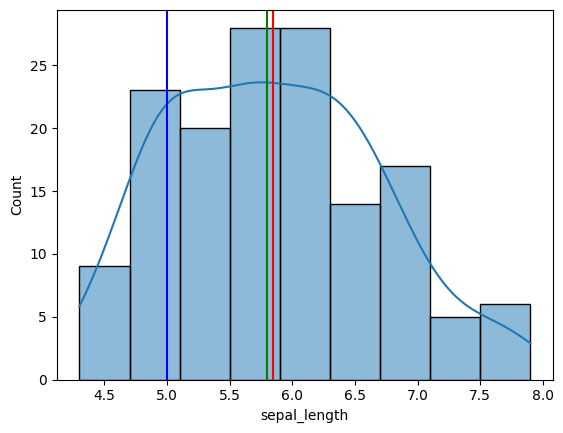

In [331]:
sns.histplot(df["sepal_length"], kde = True)
plt.axvline(df["sepal_length"].mean(), color="Red")
plt.axvline(df["sepal_length"].median(), color="Green")
plt.axvline(df["sepal_length"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["sepal_length"].mean())
print("Median : ", df["sepal_length"].median())
print("Mode : ", df["sepal_length"].mode()[0])

<Axes: xlabel='sepal_length', ylabel='Count'>

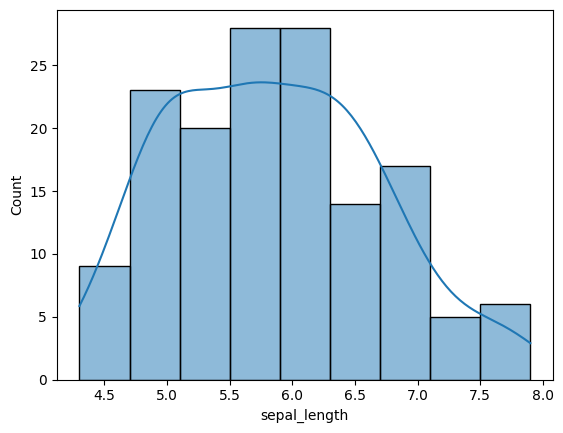

In [332]:
sns.histplot(df["sepal_length"], kde = True )

In [333]:
stats.shapiro(df["sepal_length"])

ShapiroResult(statistic=0.9760902723490532, pvalue=0.010181161454691156)

<Axes: ylabel='sepal_length'>

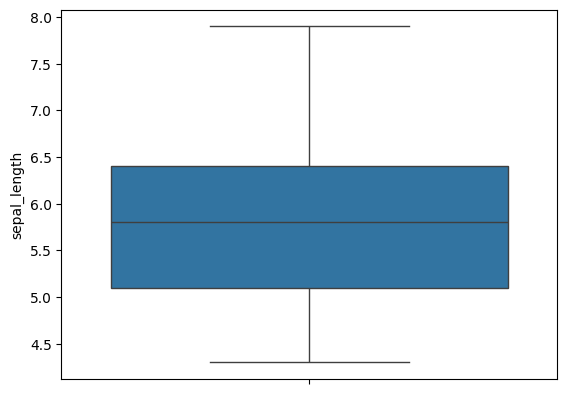

In [334]:
sns.boxplot(df["sepal_length"])

<Axes: ylabel='sepal_length'>

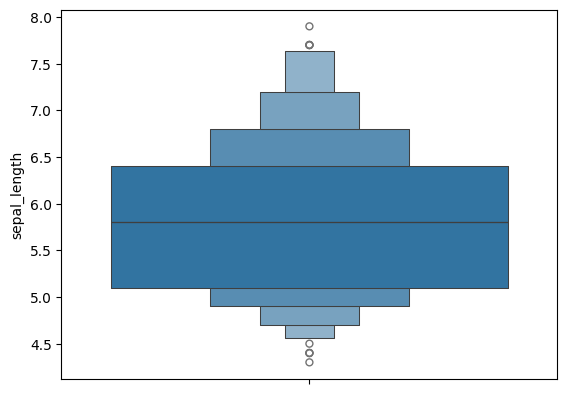

In [335]:
sns.boxenplot(df["sepal_length"])

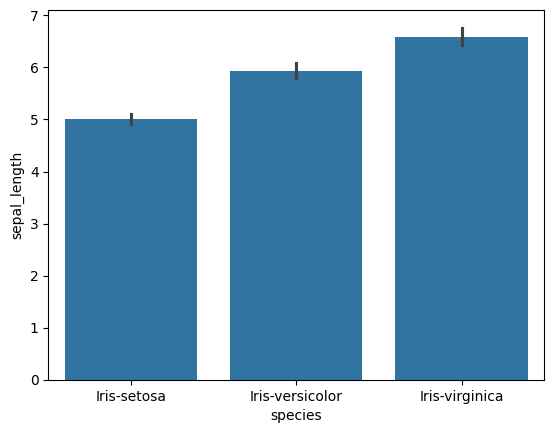

<Figure size 1000x2000 with 0 Axes>

In [336]:
sns.barplot(data=df, x ="species", y="sepal_length")
plt.figure(figsize=(10, 20))
plt.show()

### Explore sepal_width Column

In [337]:
df["sepal_width"].nunique()

23

Mean :  3.0540000000000003
Median :  3.0
Mode :  3.0


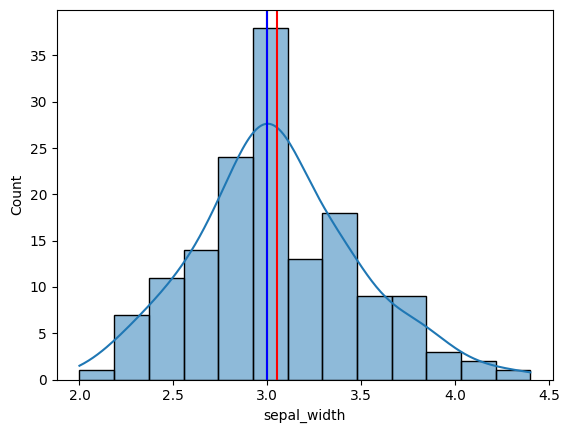

In [338]:
sns.histplot(df["sepal_width"], kde = True)
plt.axvline(df["sepal_width"].mean(), color="Red")
plt.axvline(df["sepal_width"].median(), color="Green")
plt.axvline(df["sepal_width"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["sepal_width"].mean())
print("Median : ", df["sepal_width"].median())
print("Mode : ", df["sepal_width"].mode()[0])

<Axes: xlabel='sepal_width', ylabel='Count'>

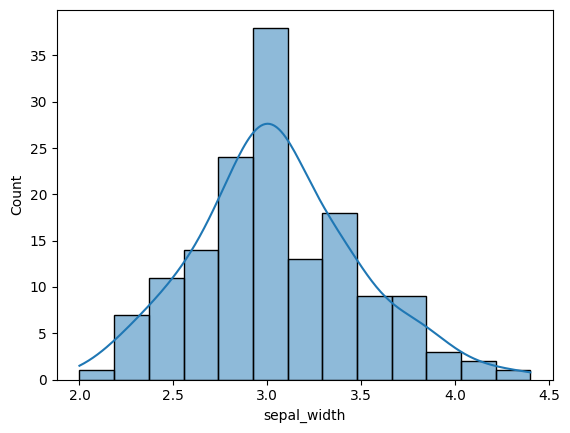

In [339]:
sns.histplot(df["sepal_width"], kde = True )

In [340]:
stats.shapiro(df["sepal_width"])

ShapiroResult(statistic=0.9837916445014413, pvalue=0.07517918532015967)

<Axes: ylabel='sepal_width'>

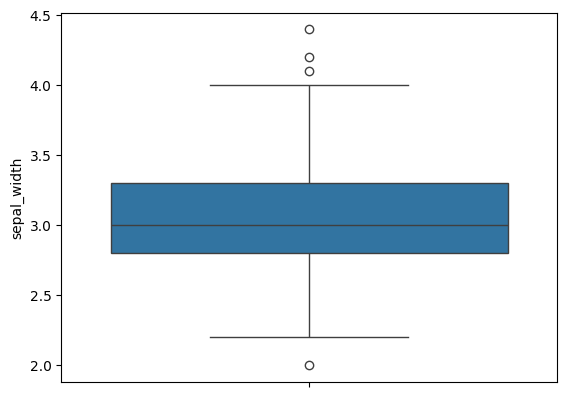

In [341]:
sns.boxplot(df["sepal_width"])

<Axes: ylabel='sepal_width'>

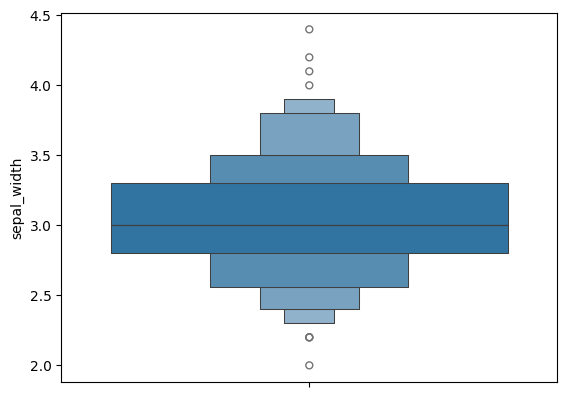

In [342]:
sns.boxenplot(df["sepal_width"])

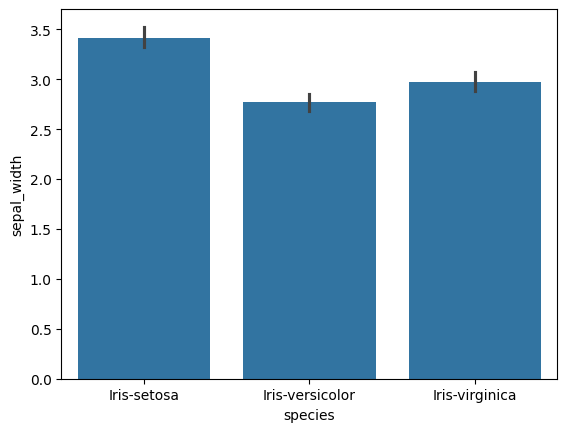

<Figure size 1000x2000 with 0 Axes>

In [343]:
sns.barplot(data=df, x ="species", y="sepal_width")
plt.figure(figsize=(10, 20))
plt.show()

### Explore petal_length Column

In [344]:
df["petal_length"].nunique()

43

Mean :  3.758666666666666
Median :  4.35
Mode :  1.5


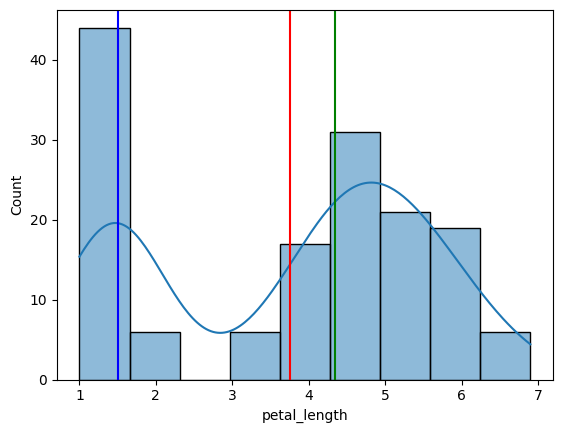

In [345]:
sns.histplot(df["petal_length"], kde = True)
plt.axvline(df["petal_length"].mean(), color="Red")
plt.axvline(df["petal_length"].median(), color="Green")
plt.axvline(df["petal_length"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["petal_length"].mean())
print("Median : ", df["petal_length"].median())
print("Mode : ", df["petal_length"].mode()[0])

<Axes: xlabel='petal_length', ylabel='Count'>

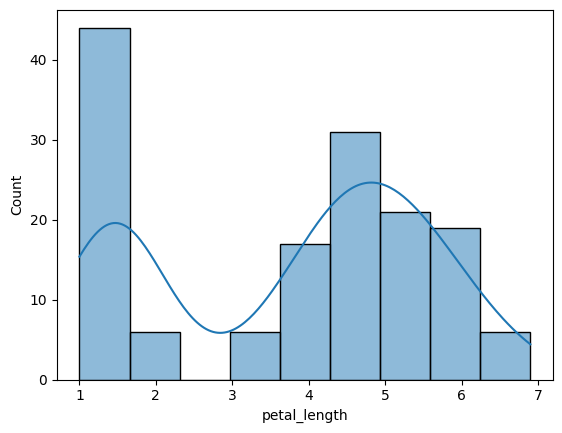

In [346]:
sns.histplot(df["petal_length"], kde = True )

In [347]:
stats.shapiro(df["petal_length"])

ShapiroResult(statistic=0.8764246351886722, pvalue=7.545419569615864e-10)

<Axes: ylabel='petal_length'>

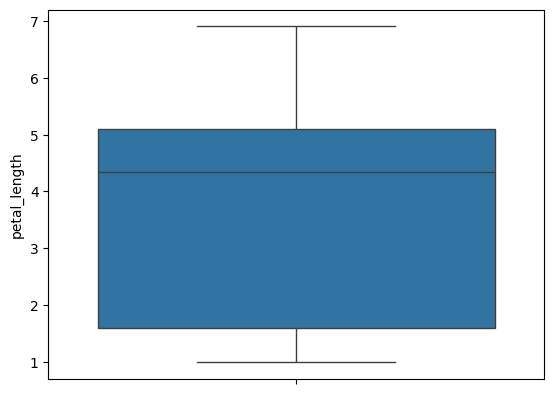

In [348]:
sns.boxplot(df["petal_length"])

<Axes: ylabel='petal_length'>

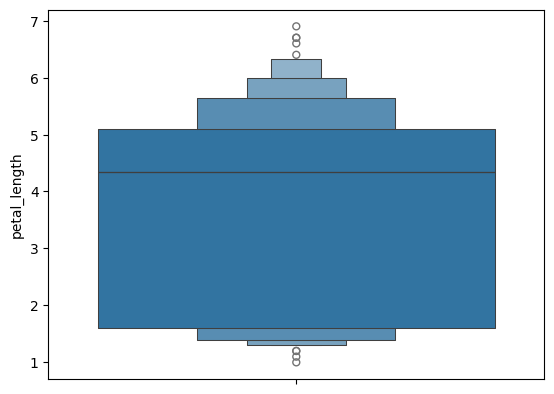

In [349]:
sns.boxenplot(df["petal_length"])

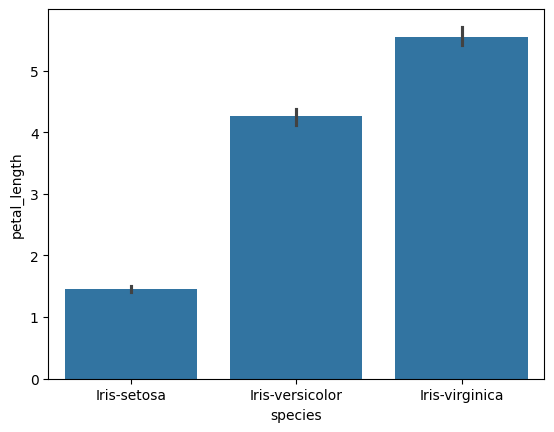

<Figure size 1000x2000 with 0 Axes>

In [350]:
sns.barplot(data=df, x ="species", y="petal_length")
plt.figure(figsize=(10, 20))
plt.show()

### Explore petal_width Column

In [351]:
df["petal_width"].nunique()

22

Mean :  1.1986666666666668
Median :  1.3
Mode :  0.2


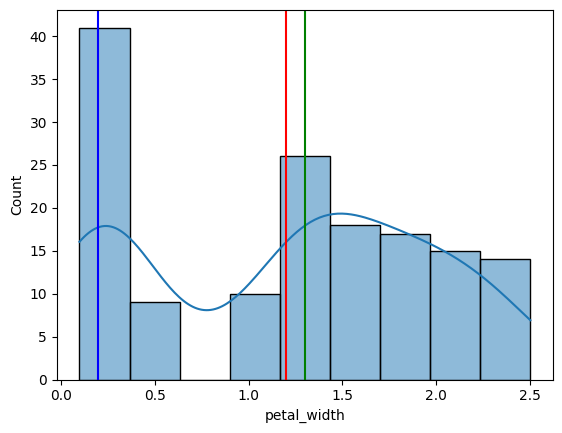

In [352]:
sns.histplot(df["petal_width"], kde = True)
plt.axvline(df["petal_width"].mean(), color="Red")
plt.axvline(df["petal_width"].median(), color="Green")
plt.axvline(df["petal_width"].mode()[0], color="Blue")

# Print 
print("Mean : ", df["petal_width"].mean())
print("Median : ", df["petal_width"].median())
print("Mode : ", df["petal_width"].mode()[0])

<Axes: xlabel='petal_width', ylabel='Count'>

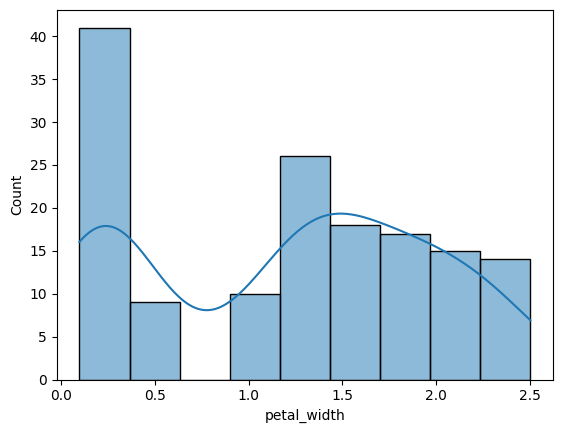

In [353]:
sns.histplot(df["petal_width"], kde = True )

In [354]:
stats.shapiro(df["petal_width"])

ShapiroResult(statistic=0.9026245656897675, pvalue=1.8647596517271003e-08)

<Axes: ylabel='petal_width'>

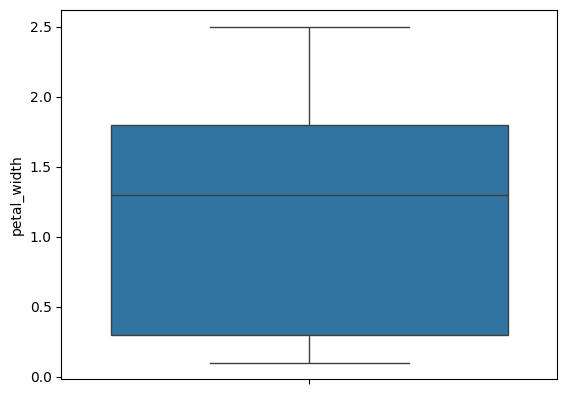

In [355]:
sns.boxplot(df["petal_width"])

<Axes: ylabel='petal_width'>

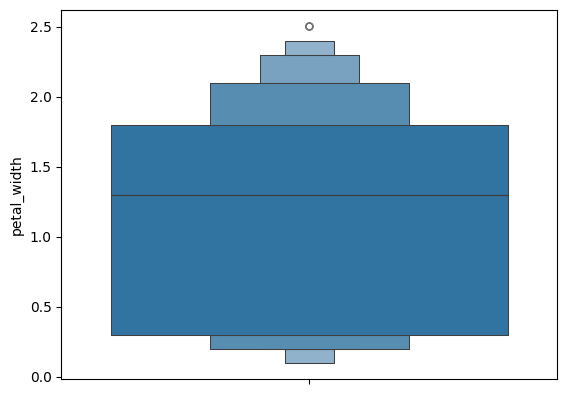

In [356]:
sns.boxenplot(df["petal_width"])

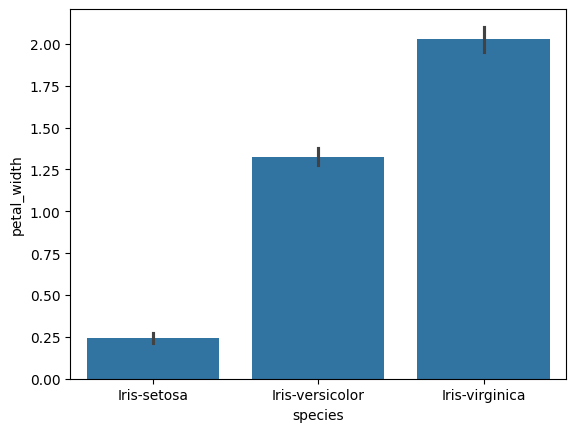

<Figure size 1000x2000 with 0 Axes>

In [357]:
sns.barplot(data=df, x ="species", y="petal_width")
plt.figure(figsize=(10, 20))
plt.show()

### Explore species Column

In [358]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Checking the Distribution of the Whole Dataset

<Axes: xlabel='sepal_length', ylabel='species'>

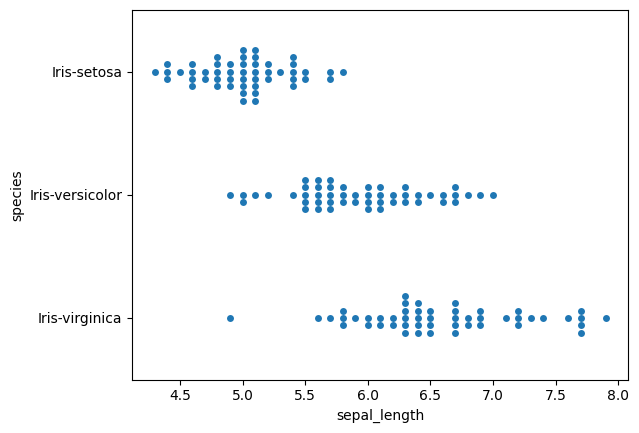

In [359]:
sns.swarmplot(data = df, x='sepal_length', y='species' )

<Axes: xlabel='sepal_width', ylabel='species'>

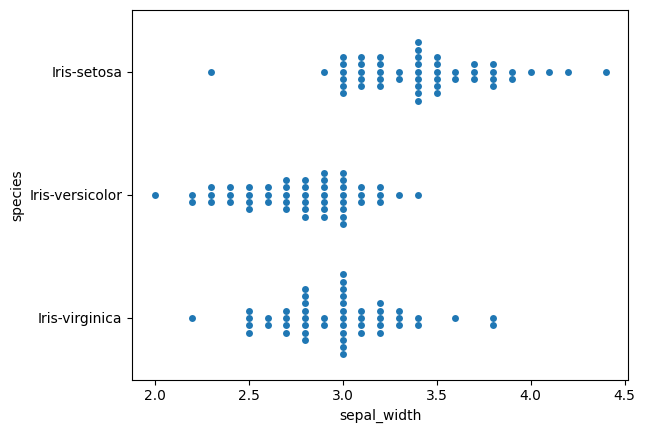

In [360]:
sns.swarmplot(data = df, x='sepal_width', y='species' )

<Axes: xlabel='petal_length', ylabel='species'>

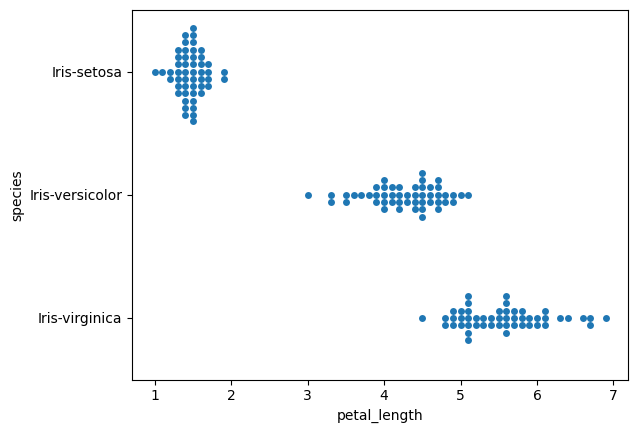

In [361]:
sns.swarmplot(data = df, x='petal_length', y='species' )

<Axes: xlabel='petal_width', ylabel='species'>

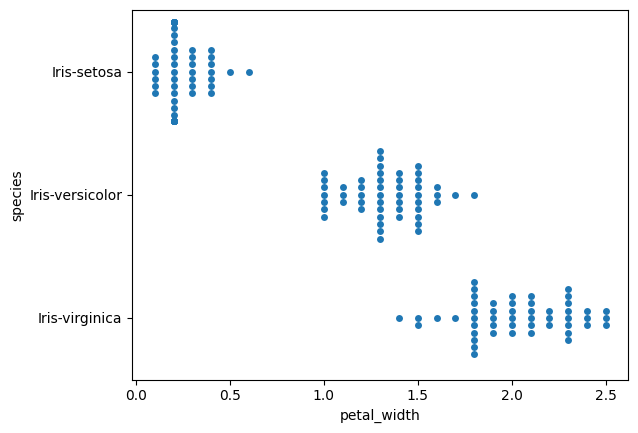

In [362]:
sns.swarmplot(data = df, x='petal_width', y='species' )

## Cleaning Data

In [363]:
cols  = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

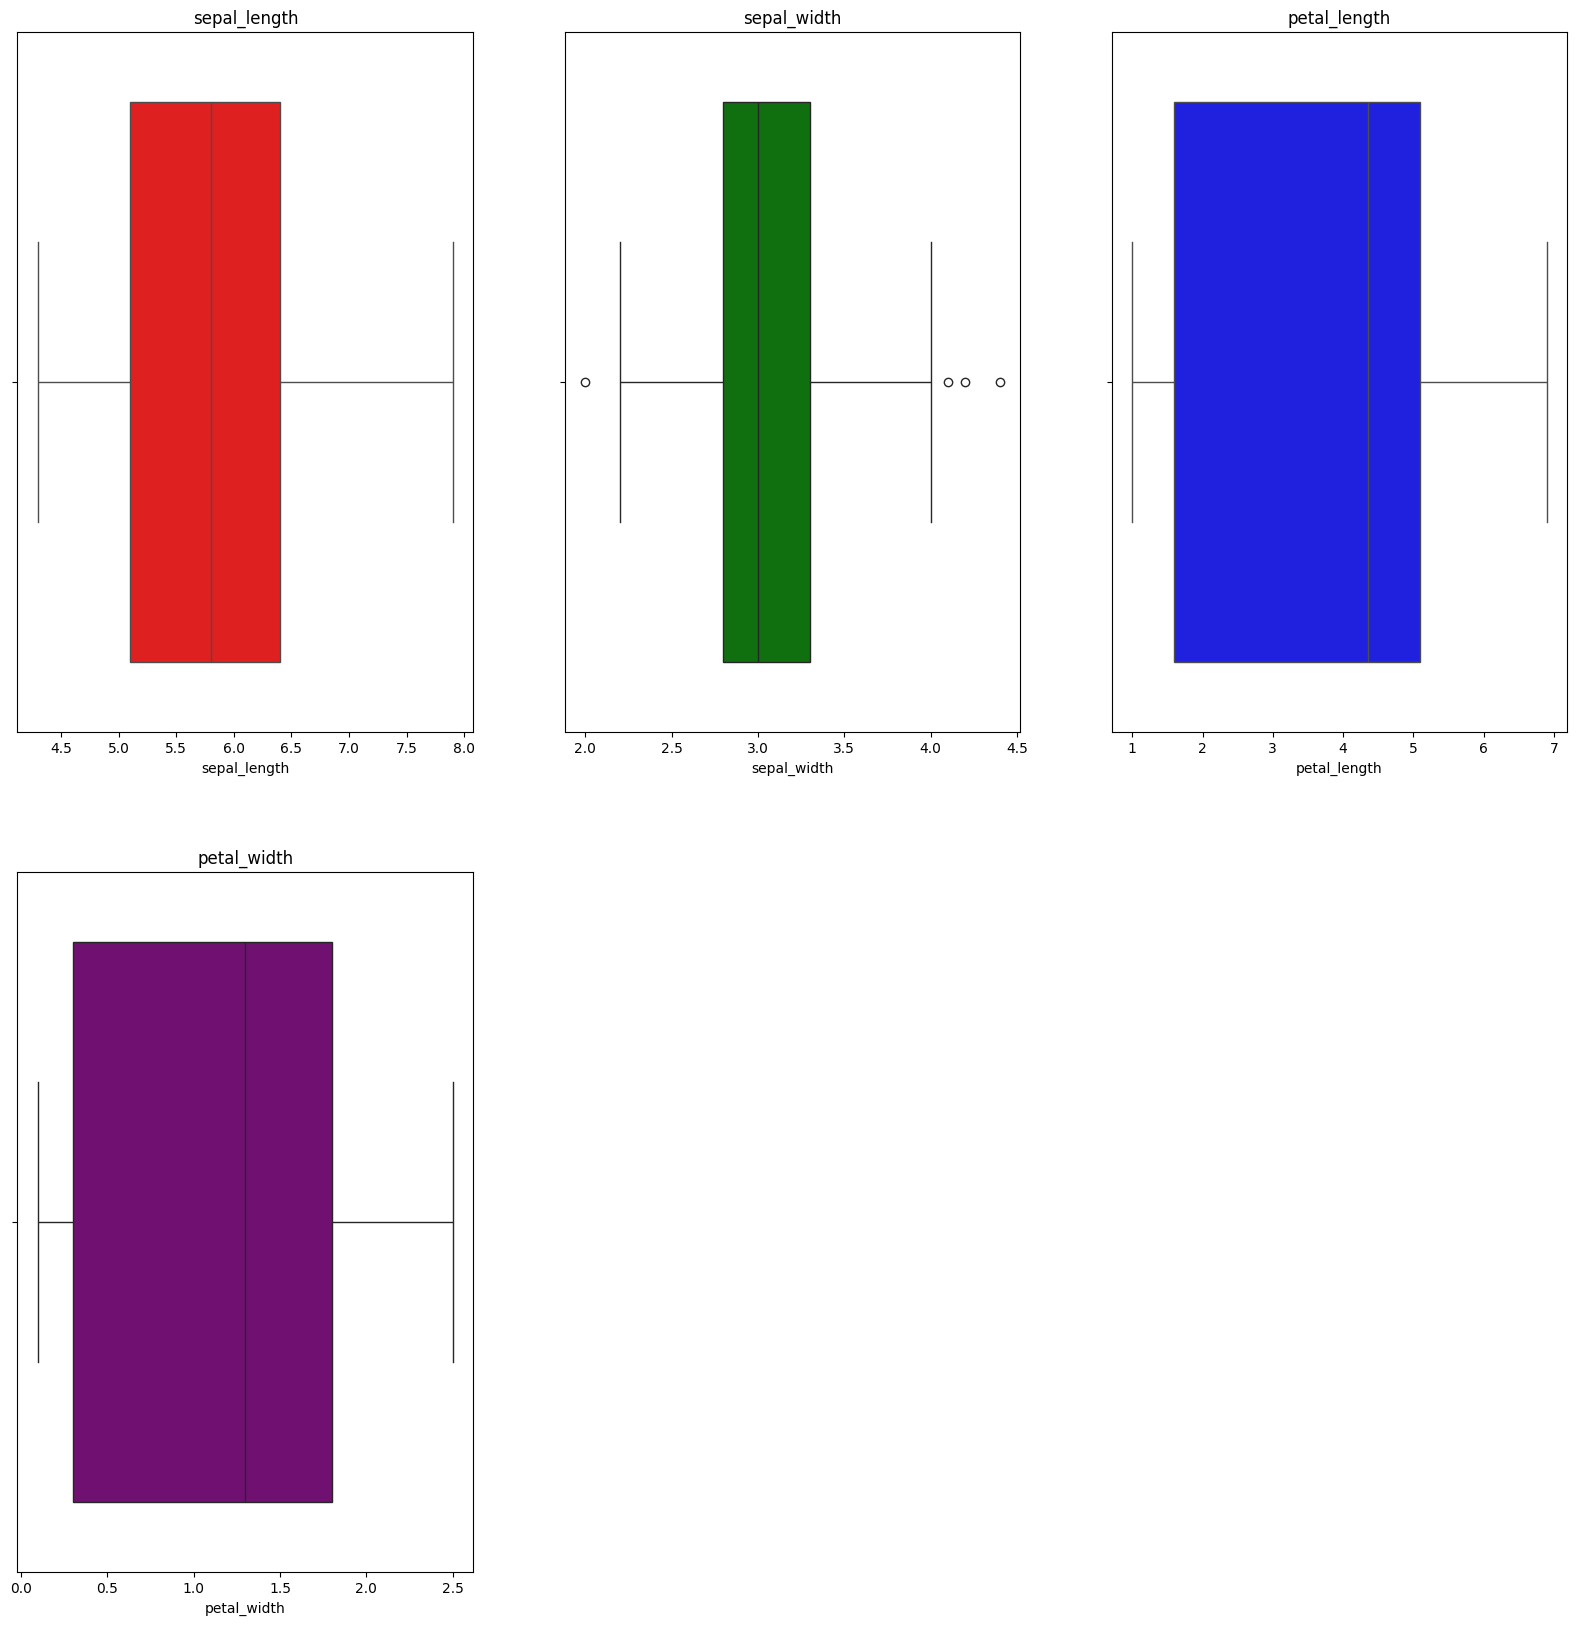

In [364]:
plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(col)

plt.show()

In [365]:
Q1 = df["sepal_width"].quantile(0.25) 
Q3 = df["sepal_width"].quantile(0.75) 
IQR = Q3 - Q1
IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df["sepal_width"] > lower_bound) & (df["sepal_width"] < upper_bound)]

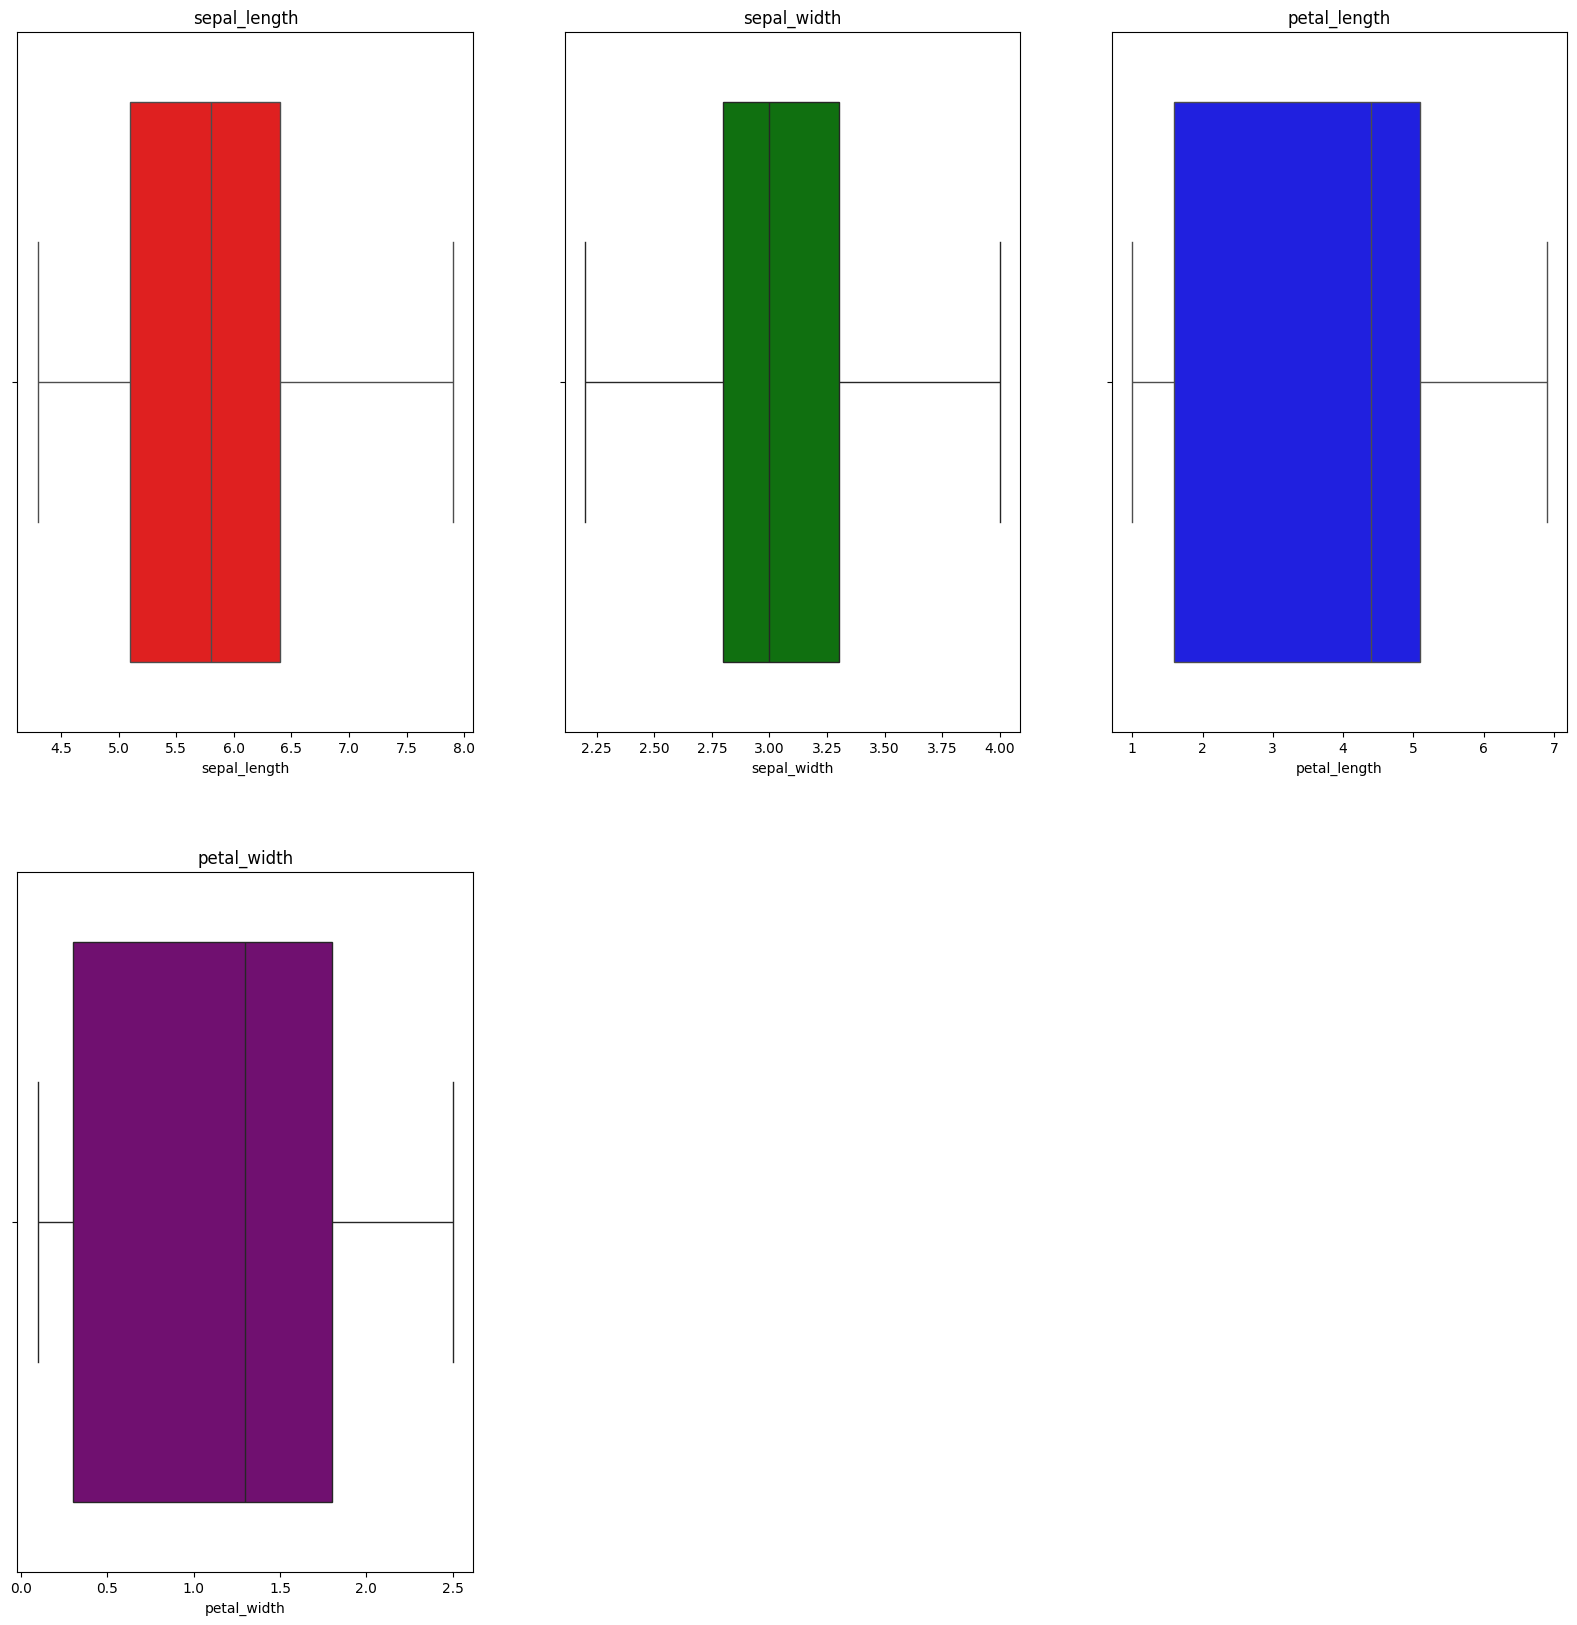

In [366]:
plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.boxplot(x=df[col], color = colors[i])
    plt.title(col)

plt.show()

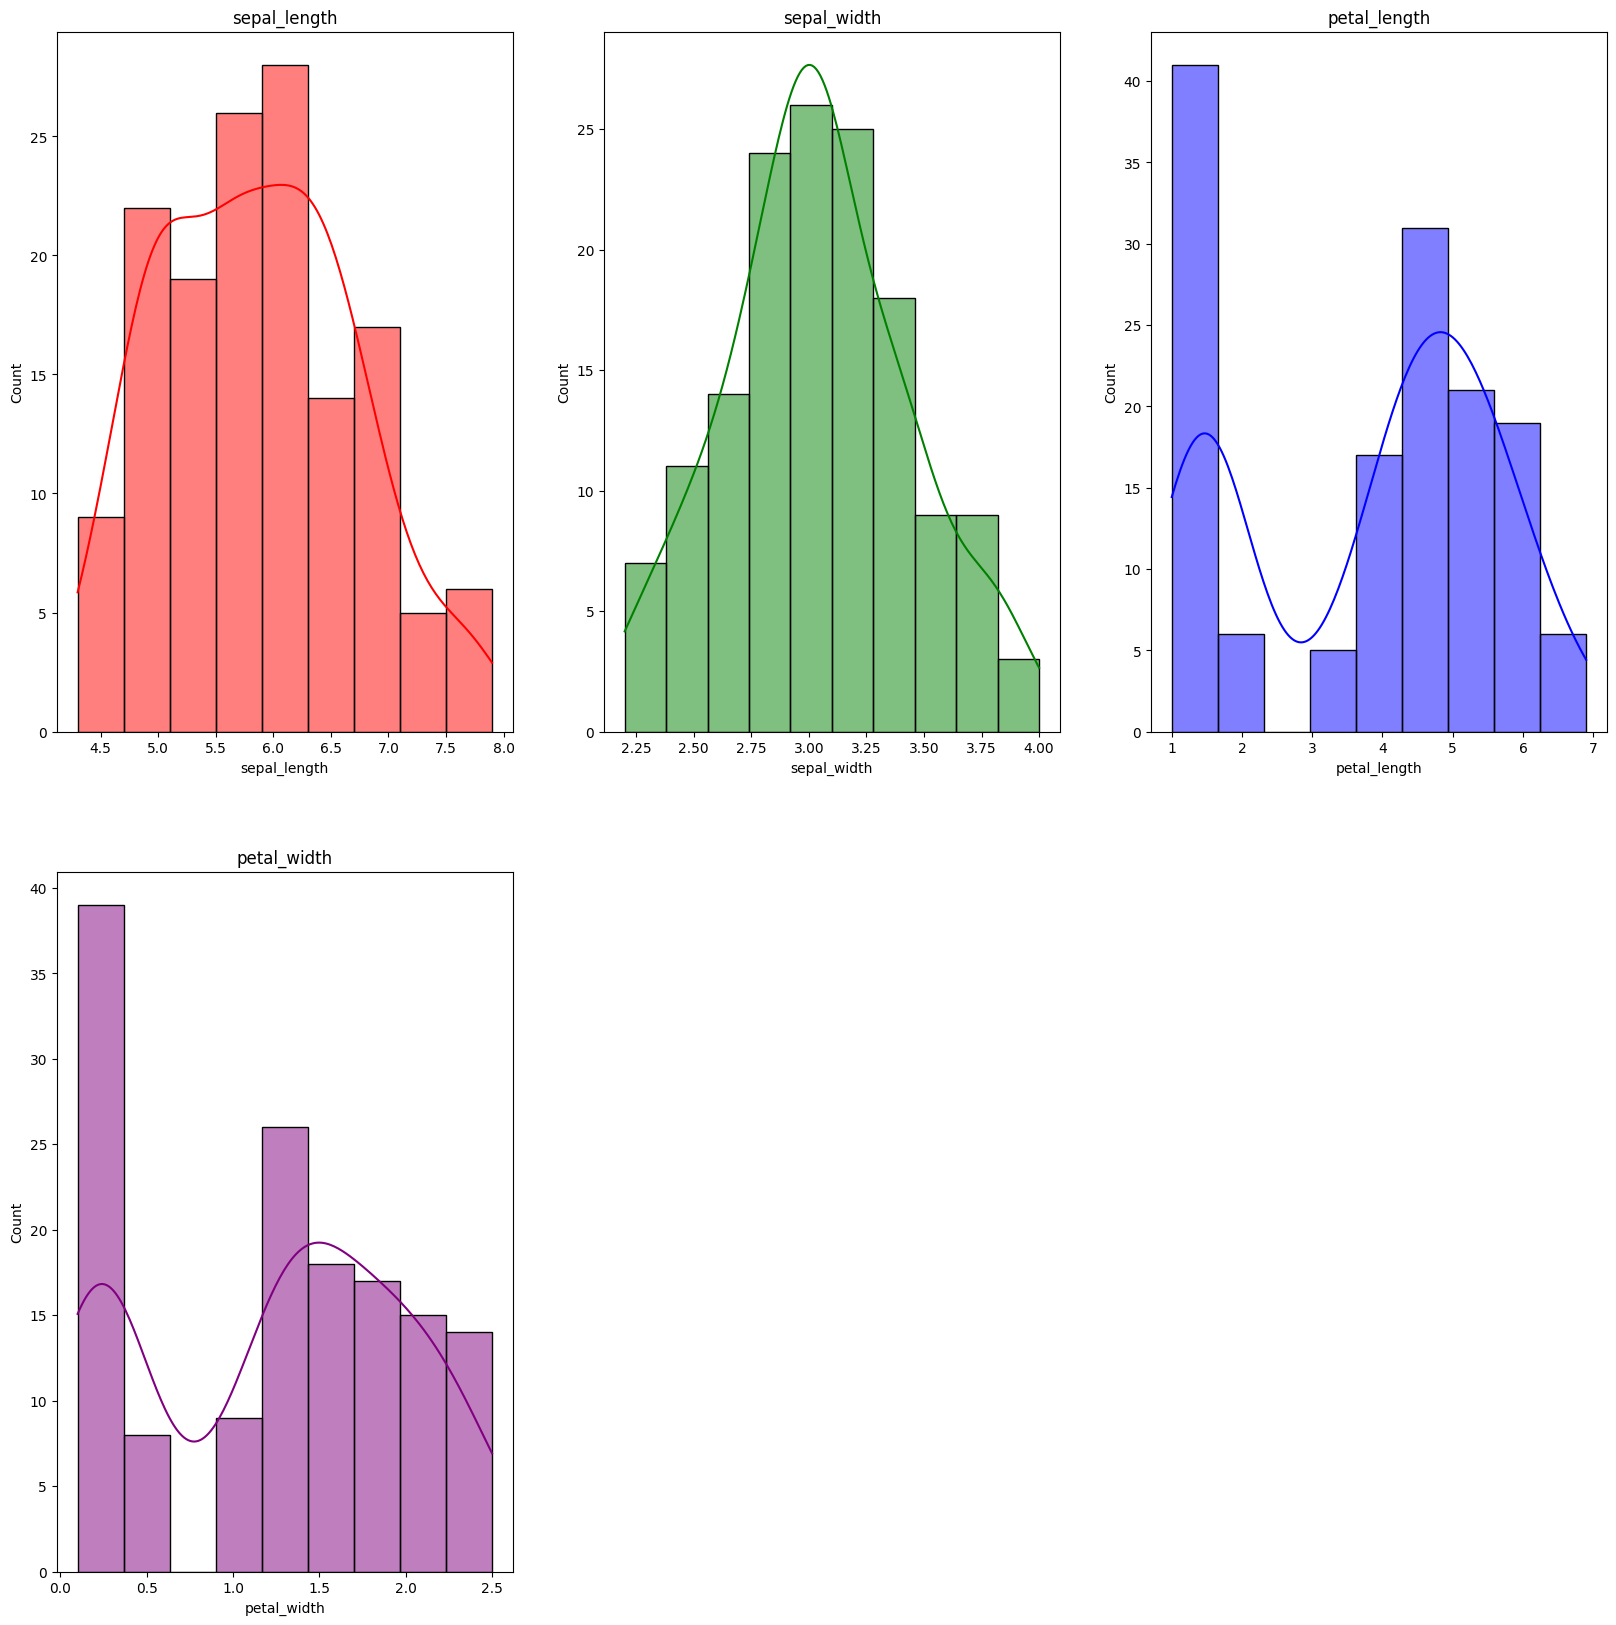

In [367]:
plt.figure(figsize = (20,20))

colors = ['red', 'green', 'blue', 'purple']

for i, col in enumerate(cols):  
    plt.subplot(2,3, i+1)  # used to define how many plots will come in one row 
    sns.histplot(x=df[col], color = colors[i], kde = True)
    plt.title(col)

plt.show()

## Statistical Analysis

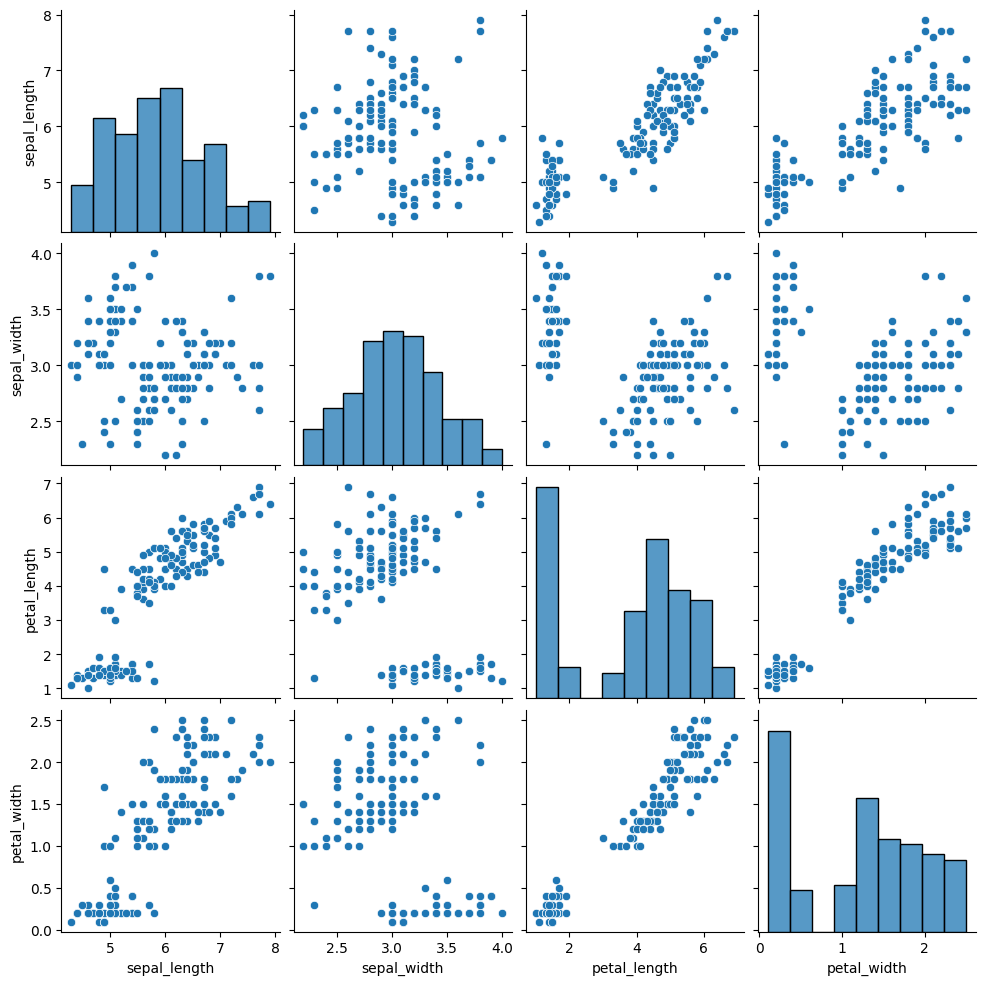

In [368]:
sns.pairplot(df)

### Data Normaization

\\ Null Hypothesis: Data is Normal

\\ Alternate Hypothesis: Data is not Normal

In [369]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

p-value: 2.6713977580731218e-08. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 0.014154600284192846. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 0.06069119780096957. Sample looks Gaussian/Normally distributed (Could not Reject H0)
p-value: 1.1387507345146484e-09. Sample does not look Gaussian/Normally distributed (Reject H0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


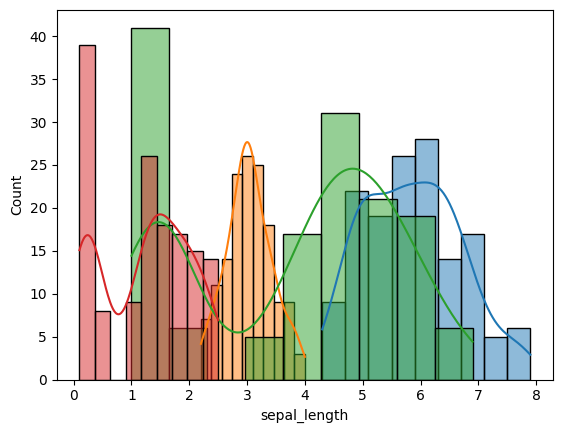

In [370]:
sns.histplot(df["sepal_length"], kde=1)

sns.histplot(df["sepal_width"], kde=1)

sns.histplot(df["petal_length"], kde=1)

sns.histplot(df["petal_width"], kde=1)

# Perform Shapiro-Wilk test for normality
#statistic, p = stats.shapiro(df["sepal_length"])

if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["sepal_length"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["sepal_width"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["petal_length"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["petal_width"])

df.head()

In [371]:
from sklearn.preprocessing import StandardScaler

# Selecting the columns you want to scale
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length']
data_to_scale = df[columns_to_scale]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected data
scaled_data = scaler.fit_transform(data_to_scale)

# Replace the original columns with the scaled ones
df[columns_to_scale] = scaled_data

print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0       -0.910515     1.175789     -1.374878    -1.345899     Iris-setosa
1       -1.151122    -0.093924     -1.374878    -1.345899     Iris-setosa
2       -1.391729     0.413961     -1.431986    -1.345899     Iris-setosa
3       -1.512032     0.160019     -1.317771    -1.345899     Iris-setosa
4       -1.030819     1.429732     -1.374878    -1.345899     Iris-setosa
..            ...          ...           ...          ...             ...
145      1.014339    -0.093924      0.795200     1.425441  Iris-virginica
146      0.533125    -1.363637      0.680985     0.897567  Iris-virginica
147      0.773732    -0.093924      0.795200     1.029536  Iris-virginica
148      0.412822     0.921846      0.909414     1.425441  Iris-virginica
149      0.051912    -0.093924      0.738093     0.765598  Iris-virginica

[146 rows x 5 columns]


p-value: 2.6713977580731218e-08. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 0.014154600284195053. Sample does not look Gaussian/Normally distributed (Reject H0)
p-value: 0.06069119780097491. Sample looks Gaussian/Normally distributed (Could not Reject H0)
p-value: 1.1387507345146484e-09. Sample does not look Gaussian/Normally distributed (Reject H0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.910515,1.175789,-1.374878,-1.345899,Iris-setosa
1,-1.151122,-0.093924,-1.374878,-1.345899,Iris-setosa
2,-1.391729,0.413961,-1.431986,-1.345899,Iris-setosa
3,-1.512032,0.160019,-1.317771,-1.345899,Iris-setosa
4,-1.030819,1.429732,-1.374878,-1.345899,Iris-setosa


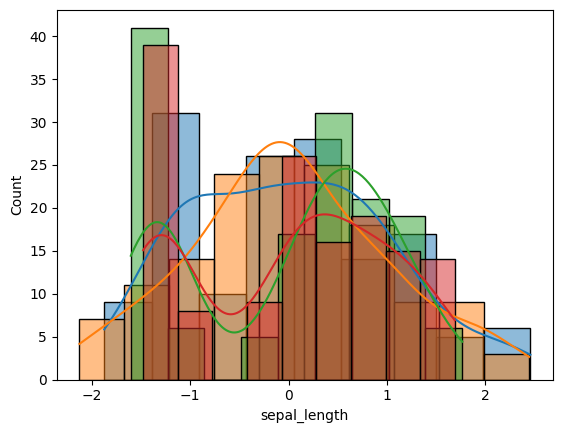

In [372]:
sns.histplot(df["sepal_length"], kde=1)

sns.histplot(df["sepal_width"], kde=1)

sns.histplot(df["petal_length"], kde=1)

sns.histplot(df["petal_width"], kde=1)

# Perform Shapiro-Wilk test for normality
#statistic, p = stats.shapiro(df["sepal_length"])

if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["sepal_length"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["sepal_width"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["petal_length"])

# Print the results
if p > 0.05:
    print(f'p-value: {p}. Sample looks Gaussian/Normally distributed (Could not Reject H0)')
else:
    print(f'p-value: {p}. Sample does not look Gaussian/Normally distributed (Reject H0)')

# Perform Shapiro-Wilk test for normality
statistic, p = stats.shapiro(df["petal_width"])

df.head()

### Homoginity Test

\\ Null Hypothesis: Data is Homoginious

\\ Alternate Hypothesis: Data is not Homoginious

In [373]:
import scipy.stats as stats
import pandas as pd

# Assuming you have already loaded your data into the p1 DataFrame

# Extract  columns from the df DataFrame
sep_e_col = df['sepal_length']
sep_w_col = df['sepal_width']
pet_w_col = df['petal_width']
pet_e_col = df['petal_length']

# Perform Levene Test
w_stat, p_val = stats.levene(sep_e_col, sep_w_col, pet_w_col, pet_e_col)

print("w_statistic:", w_stat)
print("p-value:", p_val)

if p_val < 0.05:  # Assuming alpha level of 0.05
    print(f"Variances are equal: Fail to Reject the null hypothesis")
else:
    print(f"Variances are not equal: Reject the null hypothesis")

w_statistic: 0.4261084612658654
p-value: 0.7343592939748464
Variances are not equal: Reject the null hypothesis


### t_Test (Paired Sampling)

In [374]:
print('Null Hypothesis: "There is no statistically significant difference between the means."')
print('Alternate Hypothesis: "There is a statistically significant difference between the means."')

import pandas as pd
from scipy.stats import ttest_rel

# Extract data from DataFrame
sep_e_col = df['sepal_length']
sep_w_col = df['sepal_width']
# Perform paired sample t-test
t_statistic, p_value = ttest_rel(sep_e_col, sep_w_col, )

# Print results
print("Paired sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference between the means (reject H0)")
else:
    print("There is no statistically significant difference between the means (fail to reject H0)")


Null Hypothesis: "There is no statistically significant difference between the means."
Alternate Hypothesis: "There is a statistically significant difference between the means."
Paired sample t-test results:
t-statistic: 4.711394844049334e-15
p-value: 0.9999999999999962
There is no statistically significant difference between the means (fail to reject H0)


In [375]:
print('Null Hypothesis: "There is no statistically significant difference between the means."')
print('Alternate Hypothesis: "There is a statistically significant difference between the means."')

import pandas as pd
from scipy.stats import ttest_rel

# Extract data from DataFrame
pet_w_col = df['petal_width']
pet_e_col = df['petal_length']
# Perform paired sample t-test
t_statistic, p_value = ttest_rel(pet_e_col, pet_w_col, )

# Print results
print("Paired sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference between the means (reject H0)")
else:
    print("There is no statistically significant difference between the means (fail to reject H0)")

Null Hypothesis: "There is no statistically significant difference between the means."
Alternate Hypothesis: "There is a statistically significant difference between the means."
Paired sample t-test results:
t-statistic: 1.6123865565692127e-14
p-value: 0.9999999999999871
There is no statistically significant difference between the means (fail to reject H0)


### Correlation

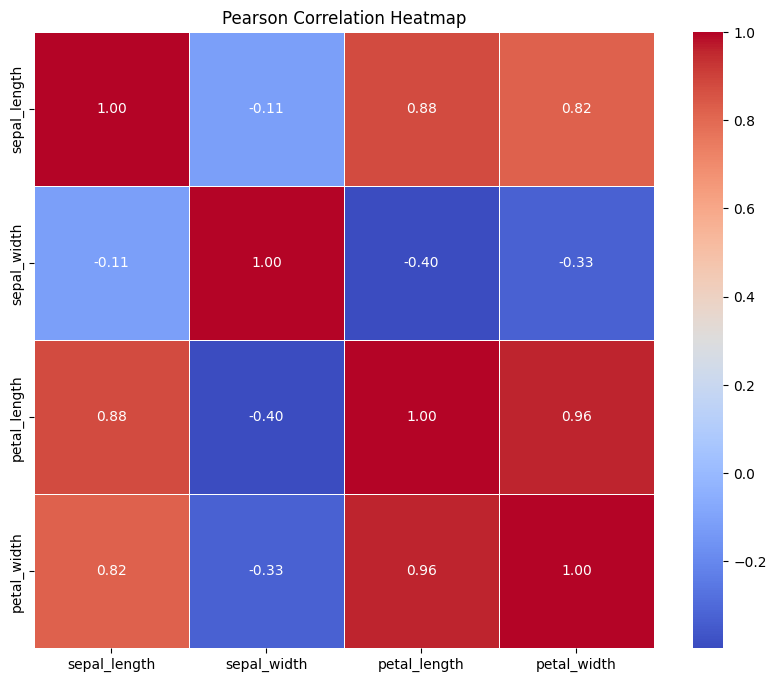

In [376]:
# Assuming you have already loaded your DataFrame 'df' and selected the desired columns
# Extract  columns from the df DataFrame
selected_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
selected_df = df[selected_columns]

# Calculate Pearson correlation matrix
correlation_matrix = selected_df.corr(method='pearson')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

## Machine Learning

### Label Encoder

In [377]:
le_spe = LabelEncoder()
df['species'] = le_spe.fit_transform(df['species'])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.910515,1.175789,-1.374878,-1.345899,0
1,-1.151122,-0.093924,-1.374878,-1.345899,0
2,-1.391729,0.413961,-1.431986,-1.345899,0
3,-1.512032,0.160019,-1.317771,-1.345899,0
4,-1.030819,1.429732,-1.374878,-1.345899,0


In [378]:
df['species'].unique()

array([0, 1, 2])

### Features and Labels 

In [379]:
# spilit the num column from X to Y
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

### Train Test Split the Whole Data

In [380]:
# Spilit the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=42)

In [381]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
121,-0.308998,-0.601809,0.623878,1.029536
137,0.653429,0.160019,0.966522,0.765598
29,-1.391729,0.413961,-1.260664,-1.345899
43,-1.030819,1.175789,-1.260664,-0.818024
108,1.014339,-1.363637,1.137844,0.765598
...,...,...,...,...
75,0.894035,-0.093924,0.338341,0.237724
110,0.773732,0.413961,0.738093,1.029536
14,-0.068392,2.445502,-1.489093,-1.345899
96,-0.188695,-0.347867,0.224127,0.105756


In [382]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
48,-0.669909,1.683674,-1.317771,-1.345899
101,-0.068392,-0.855752,0.738093,0.897567
28,-0.790212,0.921846,-1.374878,-1.345899
20,-0.549605,0.921846,-1.203556,-1.345899
45,-1.271426,-0.093924,-1.374878,-1.213930
124,1.014339,0.667904,1.080736,1.161504
30,-1.271426,0.160019,-1.260664,-1.345899
84,-0.549605,-0.093924,0.395449,0.369693
70,0.051912,0.413961,0.566771,0.765598
19,-0.910515,1.937617,-1.317771,-1.213930


In [383]:
y_test

48     0
101    2
28     0
20     0
45     0
124    2
30     0
84     1
70     1
19     0
12     0
119    2
145    2
82     1
141    2
39     0
64     1
143    2
31     0
58     1
100    2
126    2
11     0
71     1
34     0
97     1
68     1
105    2
118    2
9      0
4      0
27     0
127    2
132    2
17     0
10     0
142    2
88     1
72     1
54     1
139    2
138    2
115    2
0      0
Name: species, dtype: int32

In [384]:
y_train

121    2
137    2
29     0
43     0
108    2
      ..
75     1
110    2
14     0
96     1
106    2
Name: species, Length: 102, dtype: int32

### Model Selection (On basis of Hyperparameter Tuning, Cross-Validation and Metric Evaluation)

In [385]:
models = {
            'Linear Regression' : (LinearRegression(), {}),
            'Decision Tree Regressor' : (DecisionTreeRegressor(), {'max_depth' : [None, 5, 10]}),
            'SVR' : (SVR(), {'kernel' :  ['rbf', 'poly', 'sigmoid']}),
            'Random Forest Regressor' : (RandomForestRegressor(), {'n_estimators' : [10, 100]}),
            'KNeighborsRegressor' : (KNeighborsRegressor(), {'n_neighbors' : np.arange(3, 100, 2)}),
            'GradientBoostingRegressor' : (GradientBoostingRegressor(), {'n_estimators' : [10, 100]}),
            'XGBRegressor' : (XGBRegressor(), {'n_estimators' : [10, 100]})
}

best_models = {}  # Dictionary to store the best model for each algorithm
best_performance = float('inf')  # Initialize with a very high value

for name, (model, params) in models.items():
    # Create a Pipeline
    pipeline = GridSearchCV(model, params, cv=5)
    
    # Fit x_train and y_train in the model 
    pipeline.fit(X_train, y_train)
    
    # Get the best parameters and the best estimator (model)
    best_params = pipeline.best_params_
    best_model = pipeline.best_estimator_
    
    # Store the best model for each algorithm
    best_models[name] = best_model
    
    # Make prediction from the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate the performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Print the performance metrics
    print(name, 'Best Parameters:', best_params)
    print(name, 'MSE: ', mse)
    print(name, 'R2: ', r2)
    print(name, 'MAE: ', mae)
    print('\n')
    
    # Check if the current model performs better than the previous best model
    if mse < best_performance:
        best_performance = mse
        best_algorithm = name

# Print the name of the best performing algorithm
print("Best Performing Algorithm:", best_algorithm)


Linear Regression Best Parameters: {}
Linear Regression MSE:  0.051228488965576614
Linear Regression R2:  0.9316482738543375
Linear Regression MAE:  0.17323112522121048


Decision Tree Regressor Best Parameters: {'max_depth': None}
Decision Tree Regressor MSE:  0.045454545454545456
Decision Tree Regressor R2:  0.9393521709166093
Decision Tree Regressor MAE:  0.045454545454545456


SVR Best Parameters: {'kernel': 'rbf'}
SVR MSE:  0.03831603977011706
SVR R2:  0.9488767381151298
SVR MAE:  0.126888949344046


Random Forest Regressor Best Parameters: {'n_estimators': 10}
Random Forest Regressor MSE:  0.03409090909090909
Random Forest Regressor R2:  0.954514128187457
Random Forest Regressor MAE:  0.05454545454545456


KNeighborsRegressor Best Parameters: {'n_neighbors': 5}
KNeighborsRegressor MSE:  0.042727272727272725
KNeighborsRegressor R2:  0.9429910406616127
KNeighborsRegressor MAE:  0.08636363636363636


GradientBoostingRegressor Best Parameters: {'n_estimators': 100}
GradientBoostingRe

### Model Fitting

In [386]:
model_fit = KNeighborsRegressor()
model_fit.fit(X_train, y_train)

KNeighborsRegressor()

### Calculate evaluation metrics

In [387]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate mean of actual values
mean_y_test = np.mean(y_test)

# Calculate metrics as percentages
mae_percentage = (mae / mean_y_test) * 100
mse_percentage = (mse / mean_y_test) * 100
rmse_percentage = (rmse / mean_y_test) * 100

# Print the evaluation metrics in percentages
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percentage:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")

Mean Absolute Error (MAE): 7.67%
Mean Squared Error (MSE): 3.63%
Root Mean Squared Error (RMSE): 19.27%


In [388]:
# Calculate mean of actual values
mean_y_test = np.mean(y_test)

# Calculate metrics as percentages
mae_percentage = (mae / mean_y_test) * 100
mse_percentage = (mse / mean_y_test) * 100
rmse_percentage = (rmse / mean_y_test) * 100

# Print the evaluation metrics in percentages
print(f"Mean Absolute Error (MAE): {mae_percentage:.2f}%")
print(f"Mean Squared Error (MSE): {mse_percentage:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percentage:.2f}%")


Mean Absolute Error (MAE): 7.67%
Mean Squared Error (MSE): 3.63%
Root Mean Squared Error (RMSE): 19.27%


### Inverse Transformation

In [389]:
df['species'] = le_spe.inverse_transform(df['species'])

In [390]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.910515,1.175789,-1.374878,-1.345899,Iris-setosa
1,-1.151122,-0.093924,-1.374878,-1.345899,Iris-setosa
2,-1.391729,0.413961,-1.431986,-1.345899,Iris-setosa
3,-1.512032,0.160019,-1.317771,-1.345899,Iris-setosa
4,-1.030819,1.429732,-1.374878,-1.345899,Iris-setosa
